<a href="https://colab.research.google.com/github/junkuna/Machine-Learning-Training/blob/main/Linear_Regression_vs_KNeighbors_Regression_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Negative Trained prediction. It should be 1.5kg
[1033.33333333]
Take a look at the graph of sample 50cm


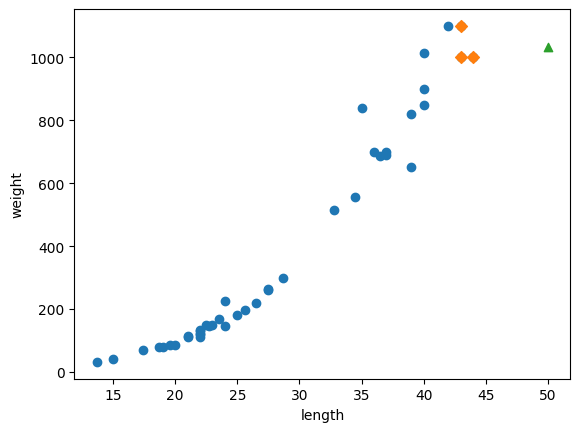

mean
1033.3333333333333
how about 100cm?
[1033.33333333]


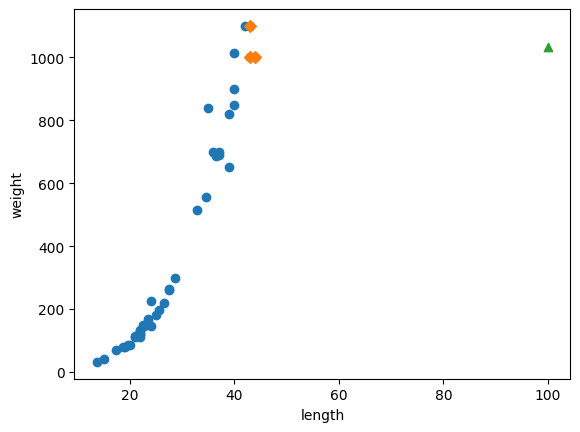

We will use LinearRegression to let big perch involves in train set boundry
[1241.83860323]
[39.01714496] -709.0186449535477


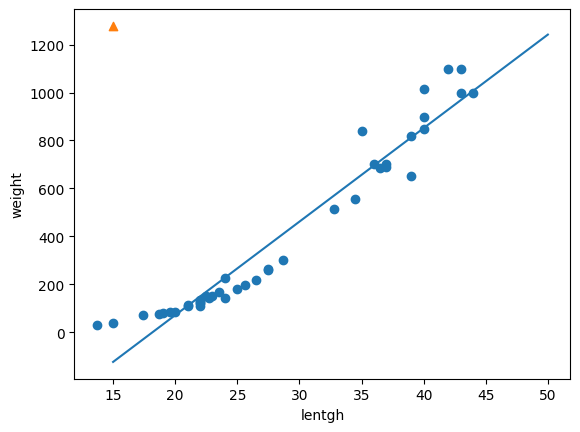

We can predict more samples
train set score is
0.939846333997604
test set score is
0.8247503123313558
We got underfitting with different score between train and test sets. There is under 0g for train sets
train 42 samples and test 14 samples
(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827
a = 1.01, b = -21.6, c = 116.05 for y = ax^2 + bx + c
model trained, we can draw the graph


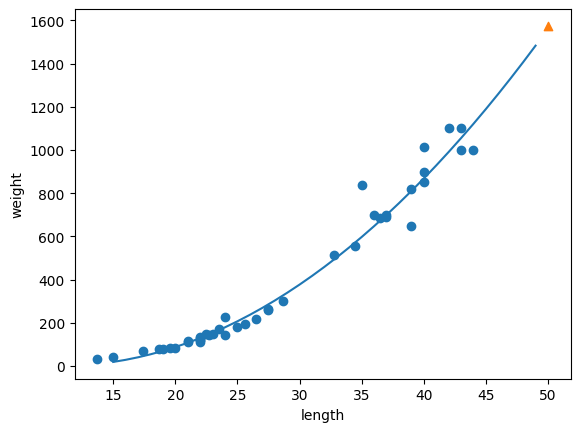

0.9706807451768623
0.9775935108325122
The train and test sets are similar, however, it is underfitting still. We need more complex models.


In [ ]:
## previous model was wrong for perch weight answer predicting perch length.
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## produce train and test sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## Using regression by sklearn
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)
print('Negative Trained prediction. It should be 1.5kg')
print(knr.predict([[50]]))

## determine with the scatter plot
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
print('Take a look at the graph of sample 50cm')
plt.show()

## check if the mean of neighbors length samples are same as trained prediction
### if sample is out of train set boundry, it might give negetive prediction. The 50cm and 100cm will give 1033g
print('mean')
print(np.mean(train_target[indexes]))
print('how about 100cm?')
print(knr.predict([[100]]))

distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print('We will use LinearRegression to let big perch involves in train set boundry')

## Drawing graph using LinearRegression, it does not involved in K-Nearest Neighbors
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

### Draw the scatter plot with 2D graph
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(15,1278, marker = '^')
plt.xlabel('lentgh')
plt.ylabel('weight')
plt.show()

print('We can predict more samples')
print('train set score is')
print(lr.score(train_input, train_target))
print('test set score is')
print(lr.score(test_input, test_target))
print('We got underfitting with different score between train and test sets. There is under 0g for train sets')


### there underfitting due to negetive weight when there is mini length value. Let's make into poly graph instead
#### model needs to be trained the polynomial regression first, then draw the graph
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

#### train 42 samples and test 12 samples
print('train 42 samples and test 14 samples')
print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)
print('a = 1.01, b = -21.6, c = 116.05 for y = ax^2 + bx + c')
print('model trained, we can draw the graph')

#### It is trained, we can draw the graph
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point **2 - 21.6 * point + 116.05)
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
print('The train and test sets are similar, however, it is underfitting still. We need more complex models.')


